<a href="https://colab.research.google.com/github/Richard-Gidi/AMDARI/blob/main/PRICE_OPTIMIZATION/Jewelry_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition

## Business Context
- **Company**: Gemineye, a luxury jewelry retailer.
- **Industry**: Luxury goods and jewelry.
- **Challenge**: Inefficient pricing strategies leading to overpricing, underpricing, and inability to dynamically adjust prices based on market trends and customer preferences.

## Goals
- Develop a data-driven pricing model to predict optimal jewelry prices.
- Implement dynamic pricing strategies to maximize revenue and profit margins.
- Improve customer satisfaction by offering competitive and fair prices.

---


## Dataset Overview
The dataset includes the following columns:

- **Order_datetime**: Timestamp of the order.
- **Order_ID**: Unique identifier for each order.
- **Product_ID**: Unique identifier for each product.
- **Quantity_of_SKU**: Quantity of the product sold.
- **Category_ID**: Identifier for the product category.
- **Category**: Name of the product category.
- **Brand_ID**: Identifier for the brand.
- **Price_USD**: Price of the product in USD (target variable).
- **User_ID**: Unique identifier for the customer.
- **Gender**: Gender of the customer.
- **Main_color**: Primary color of the jewelry.
- **Main_metal**: Primary metal used in the jewelry.
- **Main_gem**: Primary gemstone used in the jewelry.


In [ ]:
#!pip install mlflow
#!pip install pyngrok

In [1]:
from google.colab import drive


# Mount our drive to the working space
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Importing Relevant Libraries

Data Analysis

In [2]:
#Importing Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import spearmanr
import joblib #save our model


ML tracking

In [ ]:
import mlflow
import mlflow.sklearn
import subprocess
from pyngrok import ngrok, conf
import getpass

Machine learning

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Loading and Displaying of Data

In [89]:
#Load the data
original_data = pd.read_csv("/content/gdrive/MyDrive/AMDARI/Jewelry Price Optimization/Jewelry_Dataset.csv")

In [90]:
#View the data
original_data.head(5)

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [91]:
#Giving column names
original_data.columns= [
    "Order_datetime",
    "Order_ID",
    "Product_ID",
    "Quantity_of_SKU",
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
    "Gender",
    "Main_color",
    "Main_metal",
    "Main_gem"
]

In [92]:
original_data.head(5)

,Order_datetime,Order_ID,Product_ID,Quantity_of_SKU,Category_ID,Category,Brand_ID,Price_USD,User_ID,Gender,Main_color,Main_metal,Main_gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [93]:
# Make a copy of each dataset to keep the original safe
data = original_data.copy()

# Data Inspection

1. Check the shape of the dataset
2. Check the information regarding the data types and non-null rows
3. Check the percentage of missing values in each column
4. Check the unique elements in each column
5. Check the basic descriptive statistics of our dataset
6. Check for duplicates
7. Check the columns we have in our dataset
8. Visualize the distribution of our dataset and check for outliers


In [94]:
# Shape of the dataset to know the number of rows and columns
print(f"Rows: {data.shape[0]} \nColumns: {data.shape[1]}")

Rows: 95910 
Columns: 13


In [95]:
# Basic information regarding the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_datetime   95910 non-null  object 
 1   Order_ID         95910 non-null  int64  
 2   Product_ID       95910 non-null  int64  
 3   Quantity_of_SKU  95910 non-null  int64  
 4   Category_ID      90558 non-null  float64
 5   Category         85977 non-null  object 
 6   Brand_ID         91125 non-null  float64
 7   Price_USD        90558 non-null  float64
 8   User_ID          90558 non-null  float64
 9   Gender           47743 non-null  object 
 10  Main_color       88250 non-null  object 
 11  Main_metal       90448 non-null  object 
 12  Main_gem         61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


We can see that a number of our features have missing values and incorrect data types

In [96]:
# Let us investigate these missing values
missing_values = round(data.isnull().sum() / data.shape[0] * 100,2)

# Filter to only include columns with missing values and print
missing_columns = missing_values[missing_values > 0]
missing_columns

,0
Category_ID,5.58
Category,10.36
Brand_ID,4.99
Price_USD,5.58
User_ID,5.58
Gender,50.22
Main_color,7.99
Main_metal,5.69
Main_gem,35.51


These are the features with missing values and their respective percentages

In [97]:
# Check number of unique items and the unique items in each column
for column in data.columns:
    unique_values = data[column].unique()
    num_unique = len(unique_values)
    print(f"Feature: '{column}'")
    print(f"Number of unique values: {num_unique}")
    print(f"Unique values: {unique_values}\n")


Feature: 'Order_datetime'
Number of unique values: 74504
Unique values: ['2018-12-01 17:38:31 UTC' '2018-12-02 13:53:42 UTC'
 '2018-12-02 17:44:02 UTC' ... '2021-12-01 09:52:06 UTC'
 '2021-12-01 09:55:35 UTC' '2021-12-01 09:59:07 UTC']

Feature: 'Order_ID'
Number of unique values: 74759
Unique values: [1924899396621697920 1925511016616034733 1925626951238681511 ...
 2719018846999544322 2719020596963836492 2719022379232658075]

Feature: 'Product_ID'
Number of unique values: 9613
Unique values: [1806829193678291446 1842214461889315556 1835566849434059453 ...
 1515966223714641199 1515966223714641225 1536902230743974482]

Feature: 'Quantity_of_SKU'
Number of unique values: 1
Unique values: [1]

Feature: 'Category_ID'
Number of unique values: 26
Unique values: [1.80682920e+18 1.80682920e+18 1.80682920e+18 1.80682920e+18
 1.80682920e+18 1.80682920e+18 1.80682920e+18 1.80682920e+18
 1.80682920e+18            nan 1.80682920e+18 1.31367763e+18
 1.31367763e+18 1.31367763e+18 1.80682920e+18 1.806

In [98]:
# Descriptive statistics of the quantitative columns
data.describe()

,Order_ID,Product_ID,Quantity_of_SKU,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


We have an invariant feature which is "Quantity_of_SKU" and only one true quantitative feature "Price_USD"

# Detailed Analysis of `Price_USD` (Jewelry Price)

## 1. Mean
- **Value**: 362.21 USD  
- **Interpretation**: The average price of jewelry items in the dataset is 362.21 USD. This gives us a general sense of the typical price range for jewelry in the dataset.

## 2. Standard Deviation (std)
- **Value**: 444.16 USD  
- **Interpretation**: The standard deviation is quite large compared to the mean, indicating that there is substantial variation in the prices of jewelry items. This suggests that the dataset includes both low-cost jewelry and high-end, premium-priced items.

## 3. Minimum (min)
- **Value**: 0.99 USD  
- **Interpretation**: The lowest price recorded for a jewelry item is 0.99 USD. This could suggest that there are low-cost or discounted products in the dataset, or it may indicate possible data errors that should be reviewed.

## 4. 25th Percentile (25%)
- **Value**: 145.62 USD  
- **Interpretation**: 25% of the jewelry items in the dataset are priced below 145.62 USD. This suggests that a significant portion of the jewelry products are priced lower than the overall average.

## 5. Median (50th Percentile)
- **Value**: 258.77 USD  
- **Interpretation**: The median price is 258.77 USD, which is lower than the mean. This indicates that the price distribution is skewed to the right, with more lower-priced items than higher-priced ones. The median reflects the price point at which half of the products are priced below and half are priced above.

## 6. 75th Percentile (75%)
- **Value**: 431.37 USD  
- **Interpretation**: 75% of the jewelry items are priced below 431.37 USD, indicating that the top 25% of products are priced above this value. This gives insight into the distribution of higher-priced jewelry in the dataset.

## 7. Maximum (max)
- **Value**: 34,448.60 USD  
- **Interpretation**: The highest price recorded for a jewelry item is 34,448.60 USD, representing luxury or rare high-end pieces. This could be an outlier, and further investigation may be needed to verify if this is a legitimate sale or an error.

---

## Additional Insights:

### Price Distribution
- Given the large **standard deviation** and the presence of both low and high prices, the distribution of prices is likely **skewed**. A histogram or box plot would help visualize whether the data is right-skewed, with a larger number of lower-priced items and fewer higher-priced outliers.

### Outliers
- The **maximum price** of 34,448.60 USD suggests there are some extreme outliers in the dataset. These high-end products could represent luxury items, or they could be erroneous data points. Further analysis is needed to confirm if these values are legitimate.

### Price Clusters
- Based on the **25th percentile**, **median**, and **75th percentile** values, jewelry prices can be grouped into:
  - **Low-priced jewelry**: Priced below 145.62 USD.
  - **Mid-range jewelry**: Priced between 145.62 USD and 431.37 USD.
  - **High-priced jewelry**: Priced above 431.37 USD, particularly closer to the 34,448.60 USD maximum.

### Business Implications
- **Price Segmentation**: Segmenting the jewelry into low, mid, and high-priced categories can help apply targeted pricing strategies.
- **Dynamic Pricing**: Given the significant price variance, dynamic pricing models can be used to adjust prices based on market demand, competition, and customer preferences.
- **Demand Elasticity**: Lower-priced items might exhibit higher demand elasticity (sensitive to price changes), while high-priced items may have less price sensitivity (lower elasticity).

---

## Recommendations:
1. **Investigate Outliers**: Review jewelry items priced above 5,000 USD to determine if they are legitimate high-end products or potential data errors.
2. **Segment Pricing Tiers**: Segment jewelry into low, mid, and high-priced categories based on the percentiles (25%, 50%, 75%) to apply different pricing strategies for each category.
3. **Explore Correlation with Sales**: Investigate how pricing affects sales volume and profitability, especially for mid-range products, to optimize pricing for maximum revenue.



In [99]:
# Checking for duplicates
data.duplicated().sum()

2589

In [100]:
# Display all duplicate rows
data[data.duplicated(keep=False)]  # keep=False shows all occurrences of duplicates

,Order_datetime,Order_ID,Product_ID,Quantity_of_SKU,Category_ID,Category,Brand_ID,Price_USD,User_ID,Gender,Main_color,Main_metal,Main_gem
15,2018-12-04 12:40:48 UTC,1926923883428970549,1874395183001371437,1,1.806829e+18,jewelry.ring,1.0,154.88,1.515916e+18,NaN,white,gold,diamond
16,2018-12-04 12:40:48 UTC,1926923883428970549,1874395183001371437,1,1.806829e+18,jewelry.ring,1.0,154.88,1.515916e+18,NaN,white,gold,diamond
47,2018-12-12 06:27:06 UTC,1932533996177064822,1836524717922582619,1,1.806829e+18,jewelry.earring,1.0,141.62,1.515916e+18,NaN,red,gold,amethyst
48,2018-12-12 06:27:06 UTC,1932533996177064822,1836524717922582619,1,1.806829e+18,jewelry.earring,1.0,141.62,1.515916e+18,NaN,red,gold,amethyst
60,2018-12-12 16:20:31 UTC,1932832674947268611,1837931920638345257,1,1.806829e+18,jewelry.pendant,1.0,247.85,1.325156e+18,NaN,red,gold,fianit
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81272,2021-10-05 07:50:53 UTC,2677645618163220877,1956663848396128317,1,1.806829e+18,jewelry.ring,0.0,630.00,1.515916e+18,NaN,red,gold,diamond
81307,2021-10-05 11:25:49 UTC,2677753799765917730,1956663831300145187,1,1.806829e+18,jewelry.ring,0.0,194.73,1.515916e+18,NaN,red,gold,NaN
81308,2021-10-05 11:25:49 UTC,2677753799765917730,1956663831300145187,1,1.806829e+18,jewelry.ring,0.0,194.73,1.515916e+18,NaN,red,gold,NaN
81314,2021-10-05 12:21:07 UTC,2677781633259537116,1352907200745439279,1,1.806829e+18,jewelry.ring,0.0,215.14,1.515916e+18,NaN,white,gold,NaN


In [101]:
data.drop_duplicates(inplace=True)

# Why Should We Remove Duplicates in Jewelry Price Optimization?

In the context of **jewelry price optimization**, having duplicate records can lead to **incorrect pricing insights and misleading analysis**. Here's why removing them is important:

## 🔹 1. Prevents Overestimation of Sales Demand  
- If duplicates are present, the same **Order_ID** and **Product_ID** are counted multiple times.  
- This **inflates demand estimates**, leading to **overstocking** or **wrong pricing strategies**.  
- **Example:** If a ring was sold **once** but appears **twice**, our model might think it’s twice as popular.  

## 🔹 2. Ensures Accurate Revenue & Profit Calculation  
- Duplicates **double-count** revenue, leading to **incorrect pricing decisions**.  
- **Example:** If the ring costs **$154.88**, but appears twice, total revenue will show **$309.76** instead of **$154.88**.  

## 🔹 3. Prevents Biased Price Elasticity & Demand Analysis  
- If duplicates exist, price-demand relationships are skewed.  
- This might lead to **incorrect discount strategies** or **suboptimal pricing recommendations**.  
- **Example:** If demand for diamond rings appears artificially high due to duplicates, we may **increase prices** when we should not.  

## 🔹 4. Avoids Model Overfitting in Predictive Analysis  
- If training data contains duplicates, **ML models might overfit**, assuming fake trends.  
- Clean data ensures **better price predictions** for future jewelry sales.  


#Data Exploration

### Price of Jewelry

Skewness of Price: 18.919793378274285
Kurtosis of Price: 1044.1569649991407


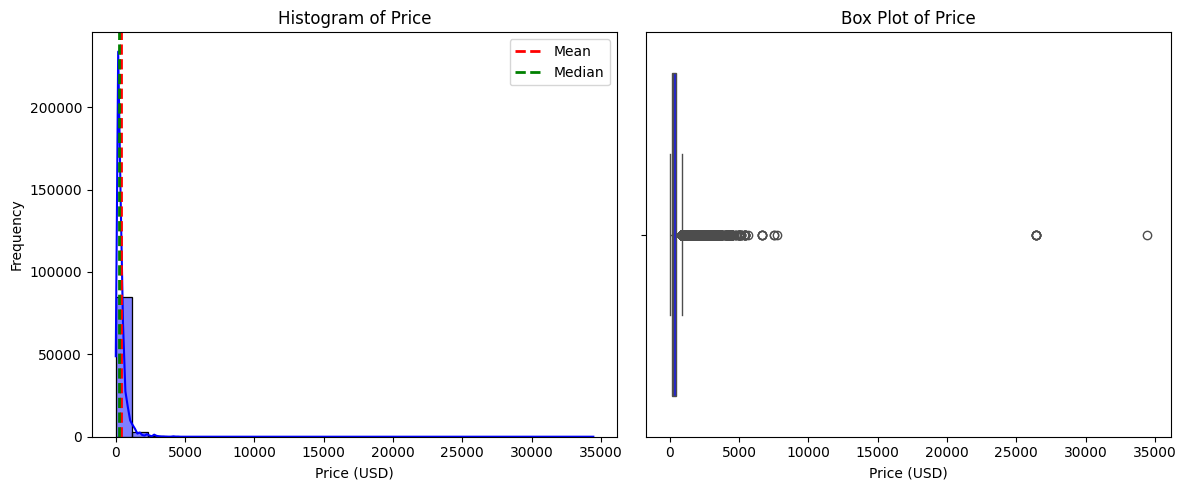

In [102]:
#Analyze the distribution of Price of the Jewelry
skew_price= data["Price_USD"].skew()
print(f"Skewness of Price: {skew_price}")

kurtosis_price= data["Price_USD"].kurtosis()
print(f"Kurtosis of Price: {kurtosis_price}")

# Create a figure for visualization
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data["Price_USD"], bins=30, kde=True, color="blue")
plt.axvline(data["Price_USD"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(data["Price_USD"].median(), color='green', linestyle='dashed', linewidth=2, label="Median")
plt.title("Histogram of Price")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.legend()

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=data["Price_USD"], color="blue")
plt.title("Box Plot of Price")
plt.xlabel("Price (USD)")

# Show the plots
plt.tight_layout()
plt.show()



- **Skewness = 18.92** → The distribution is **highly right-skewed**, meaning most prices are low, but a few extreme high values pull the distribution to the right.  
- **Kurtosis = 1044.15** → The distribution has **extremely high kurtosis**, indicating heavy tails and a strong presence of extreme outliers. Most prices are clustered within a narrow range, with rare but extreme price spikes.  

### **Implications:**
- The presence of extreme **outliers** is significantly affecting the distribution.  

### Targeted Audience

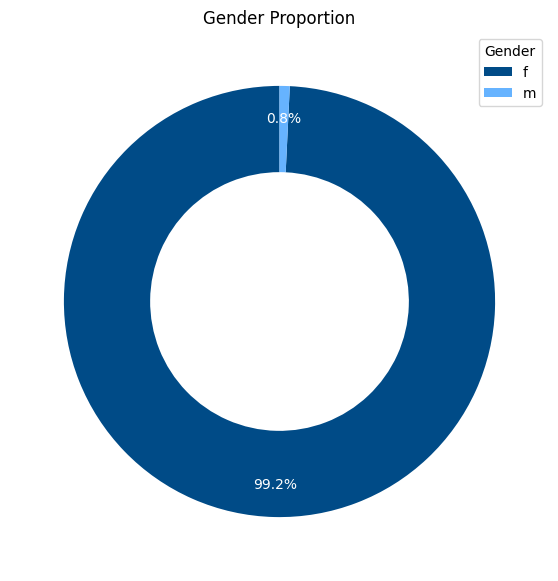

In [103]:
# Get the proportion of each gender category
gender_counts = data["Gender"].value_counts(normalize=True)

# Plotting the donut chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,
                                   colors=['#004b87', '#66b3ff'], wedgeprops={'width': 0.4}, pctdistance=0.85, textprops={'color': 'white'})

# Add a central circle to make it a donut chart
centre_circle = plt.Circle((0,0),0.3,fc='white')
plt.gca().add_artist(centre_circle)

# Title of the chart
plt.title('Gender Proportion')

# Add a legend
plt.legend(wedges, gender_counts.index, title="Gender", loc="best", fontsize=10)

# Show the plot
plt.show()


This imbalance might make sense since females generally use jewelries as compared to males

#SALES TREND

In [104]:
# Convert Order_datetime to datetime format
data["Order_datetime"] = pd.to_datetime(data["Order_datetime"])

# Extract Year and Month
data["Year"] = data["Order_datetime"].dt.year
data["Month"] = data["Order_datetime"].dt.month

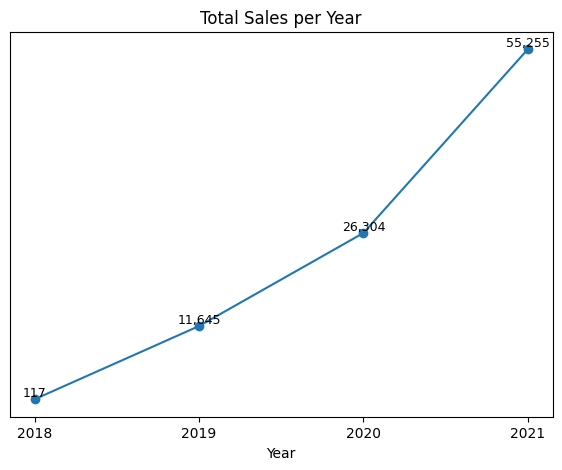

In [105]:
# Group data by Year and sum the Quantity_of_SKU
sales_trend = data.groupby("Year")["Quantity_of_SKU"].sum()

# Create a line chart with markers
fig, ax = plt.subplots(figsize=(7, 5))  # Adjusting the figure size
sales_trend.plot(kind="line", marker='o', title="Total Sales per Year", ax=ax)

# Hide the y-axis and its labels
plt.gca().get_yaxis().set_visible(False)

# Adjust the x-axis to show only the full years (remove half years)
ax.set_xticks([2018, 2019, 2020, 2021])

# Add data labels to the markers, with commas for thousands
for i, value in enumerate(sales_trend):
    ax.text(sales_trend.index[i], value, f"{int(value):,}", fontsize=9, ha='center', va='bottom')

# Show the plot
plt.show()



### Analysis:

#### **2018: 117 Units**
- Sales in **2018** were extremely low, indicating that the business was either in its early stages or faced limited demand. This could suggest **lack of brand awareness**, **product availability**, or **marketing efforts**.
- Since it is the first year, it could also reflect limited **market penetration** or seasonal effects (e.g., if the business was new and launched towards the end of the year).

#### **2019: 11,645 Units**
- A **massive increase** in sales compared to 2018 shows **strong growth**, possibly due to increased **brand recognition**, better **marketing strategies**, or improvements in **product offerings**.
- This could also be the result of a **successful marketing campaign**, such as **holiday promotions**, **seasonal launches**, or **expanded product lines**.
- It might indicate that customers were starting to recognize the brand, leading to a boost in **repeat purchases**.

#### **2020: 26,304 Units**
- The **pandemic year** (COVID-19) led to significant shifts in buying behavior. The increase in sales could be attributed to several factors:
  - **Online shopping surge**: With lockdowns and social distancing, **e-commerce** became the dominant mode of shopping.
  - **Increased gifting behavior**: Many people bought gifts for loved ones due to social distancing, birthdays, or other occasions.
  - **Product category appeal**: Jewelry, being a relatively low-cost luxury item, may have been an attractive gift option in uncertain times.
- The pandemic year seems to have had a **positive impact on sales**, as many consumers might have turned to jewelry as a form of **self-expression** or **gift-giving** during difficult times.

#### **2021: 55,255 Units**
- There was a **significant growth** in 2021, reflecting **recovery** and **resurgence** of consumer confidence as markets opened up and people began spending again.
- The sales increase could also reflect **post-pandemic demand**, where customers returned to in-person shopping and resumed higher spending patterns. Jewelry, as a form of **self-reward**, may have been in demand as people regained economic stability.
- It also suggests that the brand may have **expanded its market presence**, reached new customer segments, or launched more appealing collections during the year.

---

### Implications for Price Optimization:

#### **2018 (Low Sales):**
- In **2018**, the **117 units sold** indicate that the business needs to focus on **market penetration**. **Pricing strategies** should focus on **competitive pricing** to attract initial customers.
- **Promotions or discounts** could be introduced to incentivize early adopters and increase volume, possibly through **seasonal offers** or **bundling**.
- **Brand positioning** should emphasize **value for money**, with the goal of increasing awareness and loyalty. Since the volume was low, **affordable pricing** might have been key to driving early interest.

#### **2019 (Growth Year):**
- In **2019**, with **11,645 units sold**, the growth suggests the brand’s product offering and marketing campaigns resonated with consumers. **Price optimization** could focus on slightly **higher pricing** for premium items now that the brand had gained recognition.
- During this time, **bundling** and **seasonal discounts** could help boost sales without heavily discounting individual items. **Tiered pricing** could also be introduced to capture both **budget-conscious buyers** and those willing to spend on more premium products.

#### **2020 (Pandemic Year):**
- The **26,304 units sold** during the pandemic indicate significant demand despite the global uncertainty. This is a great opportunity to capitalize on the **e-commerce boom** and shift to **dynamic pricing models**.
- **Promotional pricing** for **gift-oriented products** would be effective in encouraging purchases for special occasions, with a focus on **affordable luxury**.
- Since more people were likely shopping for **self-care** or **gifting**, pricing strategies could include offering **personalized products**, **bundle deals**, or **special offers** for gifting to boost sales in a competitive market.
- Offering **free shipping** or **discounts on bulk purchases** could further incentivize buyers.

#### **2021 (Post-Pandemic Surge):**
- The **55,255 units sold** in 2021 indicate that the business had fully **recovered from the pandemic** and was likely experiencing sustained growth. This is an ideal time to **optimize pricing** based on **demand elasticity**.
- For **high-demand jewelry items**, **premium pricing** can be applied to capitalize on the market’s return to normalcy.
- **Tiered pricing** and **loyalty programs** should be employed to target repeat customers and drive customer retention.
- The pricing strategy can be **premium** for new collections while maintaining **competitive prices** for classic designs, ensuring that the brand captures both affluent customers and those looking for more affordable options.

---

### Price Optimization Strategy Based on Quantity Sold by Year:

#### **Early Stage (2018):**
- **Affordability** should be the primary pricing strategy to establish the brand. Focus on **competitive prices** to attract initial buyers and create awareness.

#### **Growth Stage (2019):**
- Introduce **tiered pricing** for different product categories.
- Gradually introduce **premium pricing** for high-quality or exclusive products while maintaining affordable options for the general market.

#### **Pandemic and E-Commerce Surge (2020):**
- **Dynamic pricing** based on the **e-commerce boom** and demand for gifts. Offer bundled deals, personalized pricing, and seasonal promotions.
- Focus on **affordable luxury** to attract customers seeking value.

#### **Post-Pandemic Surge (2021):**
- **Premium pricing** for high-demand products.
- Introduce **loyalty programs** and **exclusive discounts** for repeat buyers to capitalize on the large number of returning customers.
- Flexible pricing based on demand and market trends, with **seasonal pricing strategies** for peak periods (e.g., holiday season).

---

### Conclusion:

The significant increase in sales from **2018 to 2021** suggests that the brand is growing and recovering from the pandemic, with **e-commerce** and **post-pandemic spending** playing a key role. By tailoring the **pricing strategy** to each phase of growth, from **competitive pricing** for early-stage market penetration to **premium pricing** for high-demand products post-pandemic, the business can **maximize revenue** and **optimize sales** for both low and high-volume customers.


### 2. EFFECT OF COVID-19 ON SALES ###

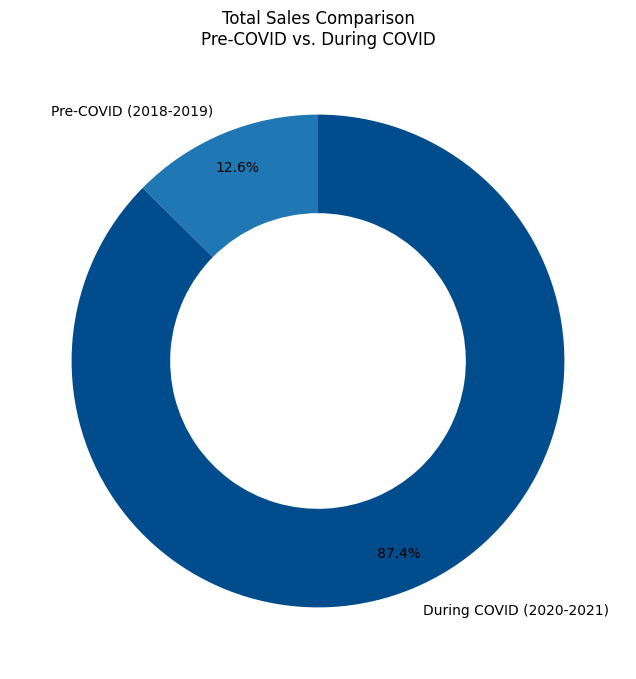

In [106]:
# Filter the data into pre-COVID (before 2020) and during COVID (2020-2021)
pre_covid = data[data['Year'] < 2020]
during_covid = data[data['Year'] >= 2020]

# Total sales before and during COVID
pre_covid_sales = pre_covid["Quantity_of_SKU"].sum()
during_covid_sales = during_covid["Quantity_of_SKU"].sum()

# Create the donut chart
labels = ['Pre-COVID (2018-2019)', 'During COVID (2020-2021)']
sizes = [pre_covid_sales, during_covid_sales]
colors = ['#1f77b4', '#004c8c']  # Deep blue for 'During COVID' and lighter blue for 'Pre-COVID'

# Plot the donut chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
       wedgeprops={'width': 0.4}, pctdistance=0.85)  # Adjusted pctdistance to move percentages away

# Add a central circle to make it a donut chart
centre_circle = plt.Circle((0,0),0.3,fc='white')
fig.gca().add_artist(centre_circle)

# Title of the chart
plt.title("Total Sales Comparison\nPre-COVID vs. During COVID")

# Show the plot
plt.show()


### 3. PRICE ELASTICITY ANALYSIS ###

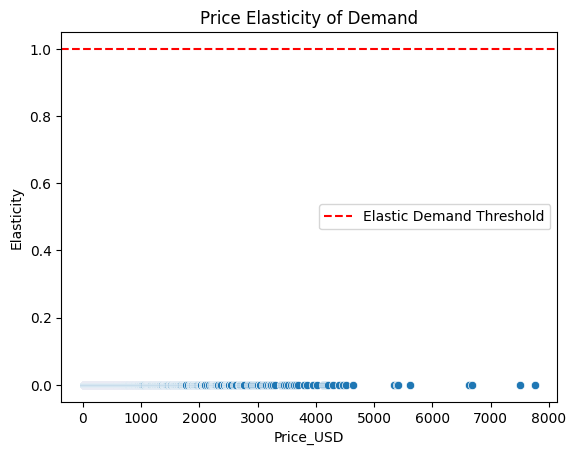

In [107]:
def price_elasticity(data):
    df = data.sort_values("Price_USD")
    df["Price_Change"] = df["Price_USD"].pct_change()
    df["Quantity_Change"] = df["Quantity_of_SKU"].pct_change()
    df = df.dropna()
    df["Elasticity"] = df["Quantity_Change"] / df["Price_Change"]
    return df[["Price_USD", "Elasticity"]]

elasticity_df = price_elasticity(data)
sns.scatterplot(data=elasticity_df, x="Price_USD", y="Elasticity")
plt.axhline(y=1, color='r', linestyle='--', label="Elastic Demand Threshold")
plt.legend()
plt.title("Price Elasticity of Demand")
plt.show()

### 4. SEASONALITY ANALYSIS ###

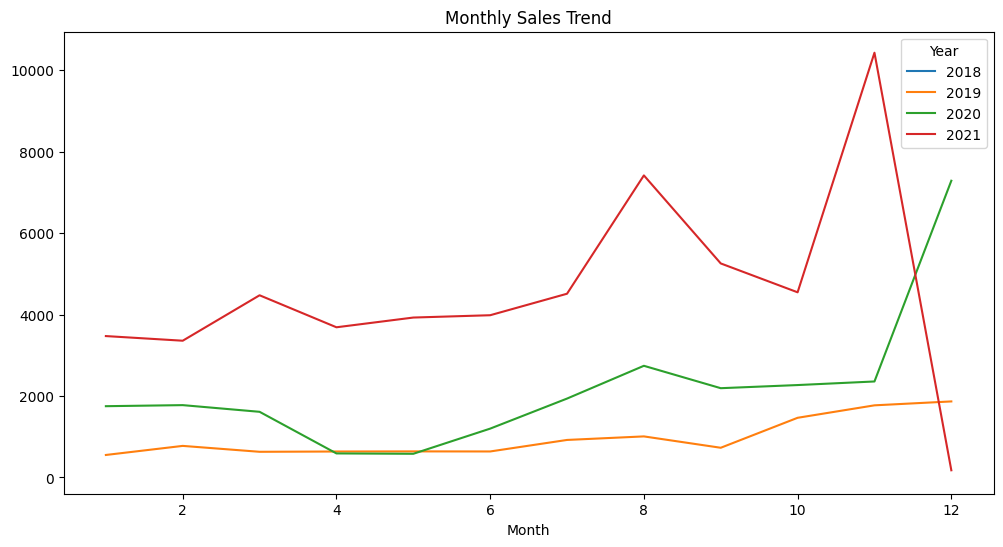

In [108]:
seasonality = data.groupby(["Year", "Month"])["Quantity_of_SKU"].sum().unstack(0)
seasonality.plot(kind="line", figsize=(12, 6), title="Monthly Sales Trend")
plt.show()

#Data Cleaning

In [109]:
#Dealing with corruption

# Filter to get the necessary records from the "Category" feature
data = data[data["Category"].str.contains("jewelry", case=False, na=False)]

# Check the result
data["Category"].unique()

array(['jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'jewelry.souvenir', 'jewelry.stud'], dtype=object)

In [110]:
#missing values
data.isnull().mean() * 100

,0
Order_datetime,0.000000
Order_ID,0.000000
Product_ID,0.000000
Quantity_of_SKU,0.000000
Category_ID,0.000000
Category,0.000000
Brand_ID,4.313138
Price_USD,0.000000
User_ID,0.000000
Gender,44.018851


We can clearly see that as we dealt with the corrupted entries, most of the missing values disappeared. We can concretely conclude that most of the missing values we had in our data was as a result of having on feature corrupted

# Data Analysis

###Top Selling Jewelries type

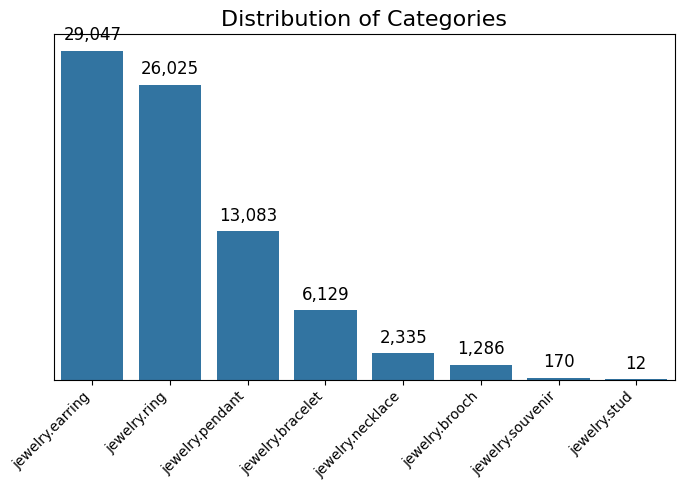

In [111]:
# Get category counts
category_counts = data["Category"].value_counts()

# Sort categories if necessary
category_counts = category_counts.sort_values(ascending=False)

# Plot the bar chart with custom color
plt.figure(figsize=(7, 5))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, color='#1f77b4')

# Add data labels on top of each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    if height > 0:  # Only add labels for bars with height > 0
        ax.text(
            p.get_x() + p.get_width() / 2.,  # X position of the label
            height + 0.02 * max(category_counts),  # Y position of the label (slightly above the bar)
            f'{int(height):,}',  # Format numbers with commas
            ha='center', va='bottom',  # Center alignment
            fontsize=12, color='black',  # Font size and color
        )

# Set title and labels
plt.title('Distribution of Categories', fontsize=16)
plt.xlabel('')  # Remove x-axis label
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha="right")

# Remove y-axis label and gridlines
ax.yaxis.set_visible(False)
plt.grid(False)

# Adjust layout
plt.tight_layout()
plt.show()


# Observations and Potential Outcomes for Optimizing Jewelry Prices

1. **Dominant Categories**  
   The categories with the highest counts (29,047 and 26,025)[earrings and rings] are likely the most popular or frequently purchased. These categories should be prioritized in terms of inventory and marketing efforts.

2. **Mid-Range Categories**  
   Categories with moderate counts (13,083 and 6,129)[pendant and bracelets] may represent niche markets or specific customer preferences. These categories could benefit from targeted promotions or bundling strategies to increase their visibility and sales.

3. **Low-Count Categories**  
   The categories with the lowest counts (2,335, 1,286, 170, and 12)[necklace,brooch,souvenir,stud] might be less popular or specialized. It may be worth analyzing whether these categories are worth maintaining or if they can be phased out to focus on more profitable areas.

4. **Price Optimization**  
   For the dominant categories, we can consider competitive pricing strategies to maximize revenue without deterring customers. For mid-range and low-count categories, dynamic pricing or discounts could help stimulate demand.

5. **Customer Segmentation**  
   Analyze customer demographics and purchasing behavior to understand why certain categories are more popular. This can help tailor marketing campaigns and product offerings to specific segments.

6. **Inventory Management**  
   Ensure that the inventory levels for high-demand categories are sufficient to meet customer needs, while avoiding overstocking less popular items.

7. **Product Differentiation**  
   For low-count categories, consider enhancing product features or marketing to differentiate them from competitors and attract more customers.

8. **Data-Driven Decisions**  
   Continuously monitor sales data and customer feedback to adjust strategies and optimize pricing dynamically.

---

By focusing on these areas, you can better align your pricing strategy with customer demand and market trends, ultimately optimizing your jewelry pricing for increased profitability.


### Average Price of each category of jewelries

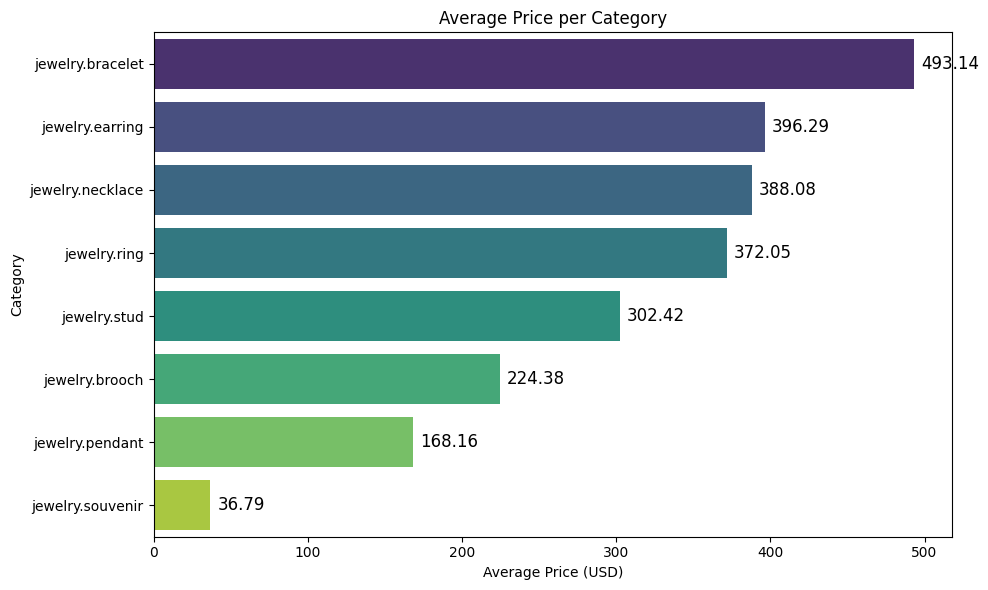

In [112]:
# Calculate average revenue per category
category_revenue = data.groupby("Category")["Price_USD"].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='viridis')

# Add data labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                fontsize=12, color='black',
                xytext=(5, 0), textcoords='offset points')

# Set title and labels
plt.title('Average Price per Category')
plt.xlabel('Average Price (USD)')
plt.ylabel('Category')

# Remove gridlines
plt.grid(False)

# Adjust layout
plt.tight_layout()
plt.show()


We can see that on average bracelet,earring,necklace and ring are on the higher side as compared to the others with souvenir being the cheapest

In [113]:
# Count number of purchases per category
category_purchases = data["Category"].value_counts()

# Calculate average price per category
category_price = data.groupby("Category")["Price_USD"].mean()

# Merge into a single DataFrame
price_purchases_df = pd.DataFrame({"Average_Price": category_price, "Total_Purchases": category_purchases})

# Compute correlation
correlation = price_purchases_df.corr().loc["Average_Price", "Total_Purchases"]
print(f"Correlation between price and purchase frequency: {correlation:.2f}")


Correlation between price and purchase frequency: 0.36


# Key Insights on Jewelry Purchases

1 **Higher-priced jewelry is slightly more likely to be purchased**  
- Since the correlation is positive, expensive jewelry tends to have more purchases, but the relationship isn’t strong.  
- Some high-priced categories may be popular despite their cost.

2 **Price is not the only factor driving purchases**  
- A correlation of 0.36 is not strong, meaning other factors like brand, design, marketing, or customer demographics may be influencing buying decisions.  
- **Example**: A luxury diamond ring may sell well due to branding rather than price alone.


### Time Based Analysis

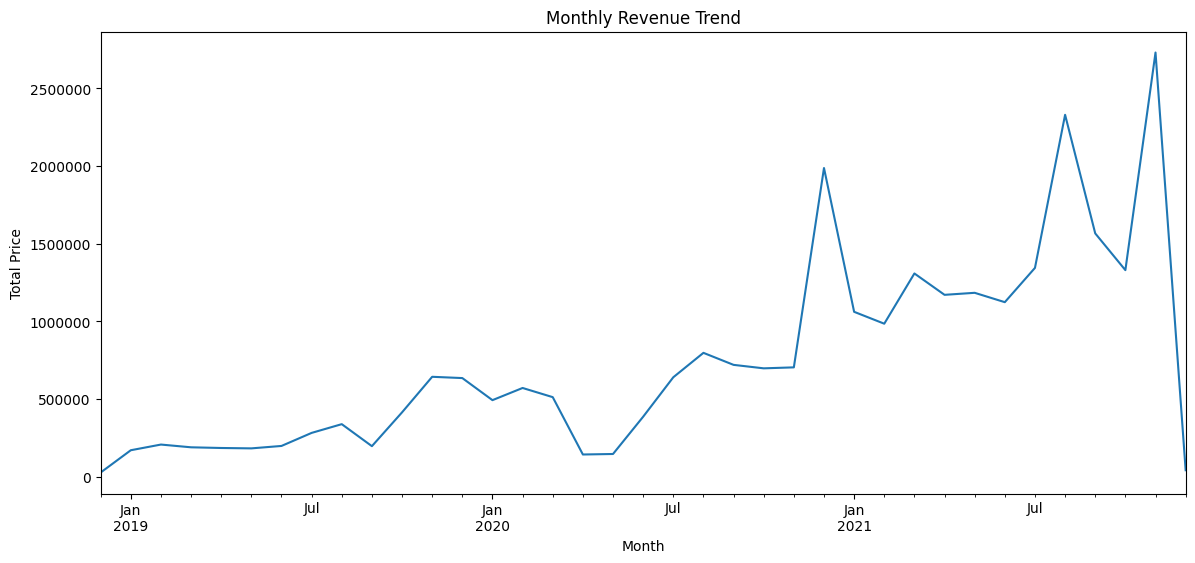

In [114]:
# Resample by month and calculate total price
monthly_price = data.set_index("Order_datetime").resample("M")["Price_USD"].sum()

# Increase figure size
plt.figure(figsize=(14, 6))

# Plot the data
ax = monthly_price.plot(title="Monthly Revenue Trend")

# Customize labels
plt.xlabel("Month")
plt.ylabel("Total Price")


# Show full price values on y-axis
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()


# Key Observations

### Steady Growth in Early Years (2019 - mid-2020):
- There is a slow but consistent rise in total prices over this period.
- This suggests stable demand or a growing market share during these months.

### Significant Dip in mid-2020:
- A noticeable drop in total prices occurs mid-2020.
- This could be due to seasonal trends, supply chain disruptions, or external factors like the COVID-19 pandemic.

### Rapid Increase Post-2020:
- Starting in early 2021, there is a sharp rise in total prices, peaking towards the end of the year.
- This could indicate increased demand, higher production costs, or strategic price adjustments by the business.

### Sharp Drop in Late 2021:
- The dramatic decline towards the end of 2021 might reflect seasonality (e.g., post-holiday demand slump), economic factors, or overstocking leading to markdowns.

---

# Insights for Jewelry Price Optimization

### Seasonal Effects:
- Peaks and drops may align with specific seasons or holidays (e.g., Valentine's Day, Christmas).
- Price adjustments should capitalize on high-demand months by offering premium pricing or promotions to boost sales during low-demand periods.

### Demand Elasticity:
- The sharp growth post-2020 suggests that customers were willing to pay higher prices during that period. Understanding what drove this demand (e.g., economic recovery, marketing efforts) can inform future pricing strategies.

### Supply Chain Resilience:
- The mid-2020 dip might be linked to supply chain disruptions or reduced consumer spending. Ensuring stable supply and inventory levels can help maintain price stability during such periods.

### Peak Optimization:
- The sharp peaks indicate potential overpricing or unmet demand during those periods. Monitoring inventory turnover during peak months can help identify if prices need to be adjusted to balance supply and demand.

### Promotions During Downturns:
- The end-of-year drop highlights the need for strategic markdowns or bundled deals to clear inventory during low-demand months without sacrificing margins.


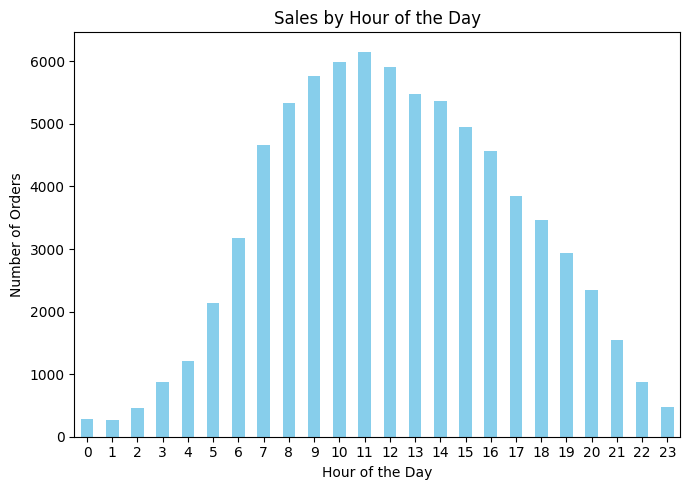

In [115]:
# Extract the hour from the Order_datetime column
data["Hour"] = data["Order_datetime"].dt.hour

# Group by hour and sum Order_ID (assuming you want to count the orders per hour)
sales_by_hour = data.groupby("Hour")["Order_ID"].count()

# Plot the sales by hour
plt.figure(figsize=(7, 5))
sales_by_hour.plot(kind="bar", color='skyblue')
plt.title("Sales by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


# Observations

## Peak Hours:
Peak sales hours where the number of orders is significantly higher. For example, hours like 10:00, 11:00, or 12:00 indicates the busiest times for sales.

## Low Activity Hours:
Hours like 0:00 to 6:00 (midnight to early morning) indicates minimal sales activity during these times.

## Trends:
There might be a gradual increase in sales from early morning (e.g., 6:00) to midday (e.g., 12:00), followed by a gradual decrease in the afternoon and evening.

# Insights and Recommendations

## Optimize Marketing Campaigns:
- Focus marketing efforts during peak hours (e.g., 10:00–14:00) to maximize customer engagement and sales.
- Consider running promotions or flash sales during these hours to capitalize on high traffic.

## Staffing and Operations:
- Ensure adequate staffing during peak hours to handle the increased number of orders efficiently.
- During low-activity hours (e.g., 0:00–6:00), reduce staffing or focus on other tasks like inventory management.

## Customer Behavior Analysis:
- Analyze why certain hours have higher sales. For example, midday peaks might be due to lunch breaks or online shopping trends.
- Use this data to tailor product offerings or promotions to match customer preferences during specific hours.

## Website Performance:
- Ensure your website or platform can handle high traffic during peak hours to avoid crashes or slow performance, which could lead to lost sales.

## Delivery and Fulfillment:
- If you offer delivery services, align delivery schedules with peak order hours to ensure timely fulfillment.


# 5. CUSTOMER SEGMENTATION BASED ON PURCHASE BEHAVIOR

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

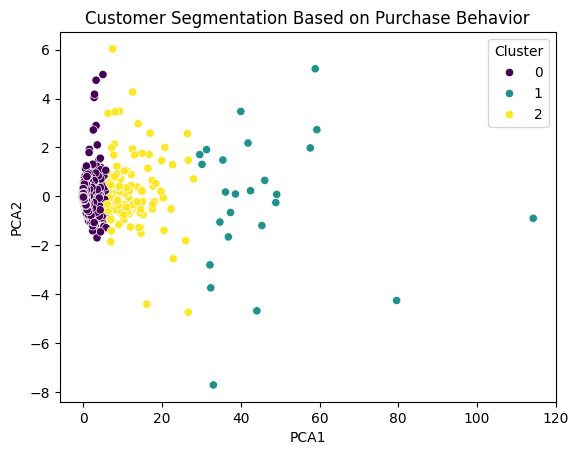

          Avg_Spending  Avg_Quantity  Avg_Frequency
Cluster                                            
0           679.549701      2.078208       2.078208
1        137280.376000    319.640000     319.640000
2         37592.748400     83.944000      83.944000


In [117]:
# Aggregate purchase behavior
customer_data = data.groupby("User_ID").agg({
    "Price_USD": "sum",  # Total spending
    "Quantity_of_SKU": "sum",  # Total quantity purchased
    "Order_ID": "count"  # Total number of purchases
}).rename(columns={"Order_ID": "Purchase_Frequency"}).reset_index()

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[["Price_USD", "Quantity_of_SKU", "Purchase_Frequency"]])

# Apply PCA for better clustering visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
customer_data["PCA1"] = pca_data[:, 0]
customer_data["PCA2"] = pca_data[:, 1]

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(scaled_data)

# Visualize Segments using PCA components
sns.scatterplot(data=customer_data, x="PCA1", y="PCA2", hue="Cluster", palette="viridis")
plt.title("Customer Segmentation Based on Purchase Behavior")
plt.show()

# Analyze customer segments
segment_summary = customer_data.groupby("Cluster").agg({
    "Price_USD": "mean",
    "Quantity_of_SKU": "mean",
    "Purchase_Frequency": "mean"
}).rename(columns={
    "Price_USD": "Avg_Spending",
    "Quantity_of_SKU": "Avg_Quantity",
    "Purchase_Frequency": "Avg_Frequency"
})
print(segment_summary)

# Customer Segmentation Analysis and Jewelry Price Optimization

### Cluster Breakdown

| Cluster | Avg_Spending (USD) | Avg_Quantity | Avg_Frequency |
|---------|--------------------|--------------|---------------|
| 0       | 679.55             | 2.08         | 2.08          |
| 1       | 137,280.38         | 319.64       | 319.64        |
| 2       | 37,592.75          | 83.94        | 83.94         |

---

### **Cluster 0: Moderate Spending, Low Quantity, and Low Frequency**

- **Avg_Spending**: 679.55 USD
- **Avg_Quantity**: 2.08 items
- **Avg_Frequency**: 2.08 purchases

#### **Interpretation**:
- Customers in **Cluster 0** are **moderate spenders**, purchasing a small number of items and doing so occasionally.
- This cluster might represent **regular but selective buyers**, possibly purchasing **higher-end or exclusive items** less frequently.

#### **Jewelry Price Optimization**:
- Focus on **premium pricing** for **exclusive or high-quality pieces**.
- Encourage higher spending through **personalized offers** or **exclusive collections**.
- Introduce **loyalty programs** or **seasonal promotions** to drive repeat purchases.

---

### **Cluster 1: High Spending, Very High Quantity, and High Frequency**

- **Avg_Spending**: 137,280.38 USD
- **Avg_Quantity**: 319.64 items
- **Avg_Frequency**: 319.64 purchases

#### **Interpretation**:
- **Cluster 1** represents the **biggest spenders** who purchase **large quantities of jewelry** very frequently.
- These customers may be **wholesale buyers**, **frequent shoppers**, or **business clients**.

#### **Jewelry Price Optimization**:
- Focus on **volume-based pricing** and **bulk discounts** to cater to their high purchasing capacity.
- Consider **wholesale pricing** or **exclusive deals** for **frequent bulk buyers**.
- Offer **tiered pricing** based on the number of items purchased or **loyalty incentives** to encourage even more frequent purchases.

---

### **Cluster 2: High Spending, Moderate Quantity, and Moderate Frequency**

- **Avg_Spending**: 37,592.75 USD
- **Avg_Quantity**: 83.94 items
- **Avg_Frequency**: 83.94 purchases

#### **Interpretation**:
- **Cluster 2** represents customers who have **high spending** but purchase a **moderate quantity of jewelry** on a **regular basis**.
- These customers might be **enthusiastic buyers** looking for **premium products** but not in the large quantities seen in Cluster 1.

#### **Jewelry Price Optimization**:
- Focus on offering **premium pricing** but not to the extent of bulk buyers in Cluster 1.
- Consider **bundle pricing** or **volume discounts**, but more in line with **moderate purchases**.
- Encourage **regular purchases** by offering **loyalty programs**, **exclusive promotions**, or **early access to new collections**.

---

### **Price Optimization Strategy by Cluster**

- **Cluster 0 (Moderate Spenders)**:
  - **Pricing Strategy**: Premium pricing for high-quality, exclusive items.
  - **Promotion**: Personalized offers, loyalty programs, seasonal sales.
  
- **Cluster 1 (High Spenders, High Frequency)**:
  - **Pricing Strategy**: Volume-based pricing, wholesale discounts, tiered pricing.
  - **Promotion**: Loyalty programs for bulk purchases, VIP offers for repeat high-volume buyers.
  
- **Cluster 2 (High Spenders, Moderate Frequency)**:
  - **Pricing Strategy**: Premium but accessible pricing, bundle offers.
  - **Promotion**: Incentives for regular purchases, exclusive deals, early access to new collections.



In [118]:
# Identify high-value customers
high_value_customers = customer_data[customer_data["Cluster"] == segment_summary["Avg_Spending"].idxmax()]

# Retention strategies for frequent but low-spending customers
low_spending_frequent = customer_data[(customer_data["Cluster"] == segment_summary["Avg_Frequency"].idxmax()) &
                                      (customer_data["Quantity_of_SKU"].mean() < segment_summary["Avg_Spending"].median())]

# Adjust pricing strategies based on segment behaviors
pricing_strategies = segment_summary.copy()
pricing_strategies["Recommended_Action"] = np.where(pricing_strategies["Avg_Spending"] > pricing_strategies["Avg_Spending"].median(),
                                                     "Premium Pricing",
                                                     "Discounts and Promotions")
print("Pricing Strategies:")
print(pricing_strategies)

Pricing Strategies:
          Avg_Spending  Avg_Quantity  Avg_Frequency        Recommended_Action
Cluster                                                                      
0           679.549701      2.078208       2.078208  Discounts and Promotions
1        137280.376000    319.640000     319.640000           Premium Pricing
2         37592.748400     83.944000      83.944000  Discounts and Promotions


##Customer Purchasing Behavior

In [119]:
repeat_customers = data["User_ID"].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1]

repeat_rate = len(repeat_customers) / data["User_ID"].nunique()
print(f"Repeat Customer Rate: {repeat_rate:.2%}")

Repeat Customer Rate: 37.03%


This means that 37.03% of your customers have made more than one purchase which is okay

In [120]:
purchase_dates = data.groupby("User_ID")["Order_datetime"].agg(["min", "max", "count"])
purchase_dates["purchase_cycle"] = (purchase_dates["max"] - purchase_dates["min"]) / (purchase_dates["count"] - 1)

purchase_dates["purchase_cycle"].dropna().describe()


,purchase_cycle
count,10677
mean,36 days 11:46:01.631705650
std,84 days 20:33:42.993083574
min,0 days 00:00:00
25%,0 days 00:01:26
50%,0 days 20:33:05
75%,28 days 20:19:25.500000
max,991 days 18:26:07


# Understanding the Purchase Cycle

The purchase cycle data shows the time between consecutive purchases by each customer. Here's a breakdown of the key statistics:

- **Count**: 10,677 records of purchase cycles.
- **Mean**: On average, customers make a purchase every 36 days and 11 hours.
- **Standard Deviation**: The large standard deviation (about 85 days) suggests wide variability in purchase frequency, with some customers buying much more frequently than others.
- **Min**: The minimum purchase cycle is 0 days, meaning some customers make multiple purchases within the same day.
- **25% (Q1)**: 25% of customers make their next purchase within approximately 1 minute to 28 days after the previous one.
- **50% (Median)**: The median cycle is 20 hours and 33 minutes, indicating that half of your customers make purchases more frequently than this, while the other half takes longer.
- **75% (Q3)**: 75% of customers make their next purchase within 28 days and 20 hours.
- **Max**: The longest recorded purchase cycle is 991 days, indicating that some customers wait nearly 3 years before making another purchase.

---

# What This Means for Jewelry Price Optimization

### 1. Targeting Repeat Buyers with Pricing Strategies
- **Frequent buyers** (shorter purchase cycle) could be incentivized with discounts or loyalty rewards to encourage faster repeat purchases.
- For **infrequent buyers** (longer cycle), you may need to offer special promotions or email reminders to nudge them back to purchasing.

### 2. Adjusting Pricing Over Time
- The long purchase cycle (e.g., 991 days) suggests that some customers may not be sensitive to short-term pricing fluctuations. Offering them a premium product line or exclusive offers after a certain period could boost purchases.
- **Frequent buyers** may respond better to timely discounts or limited-time offers.


<Axes: title={'center': 'New vs. Returning Customers Over Time'}, xlabel='Order Month'>

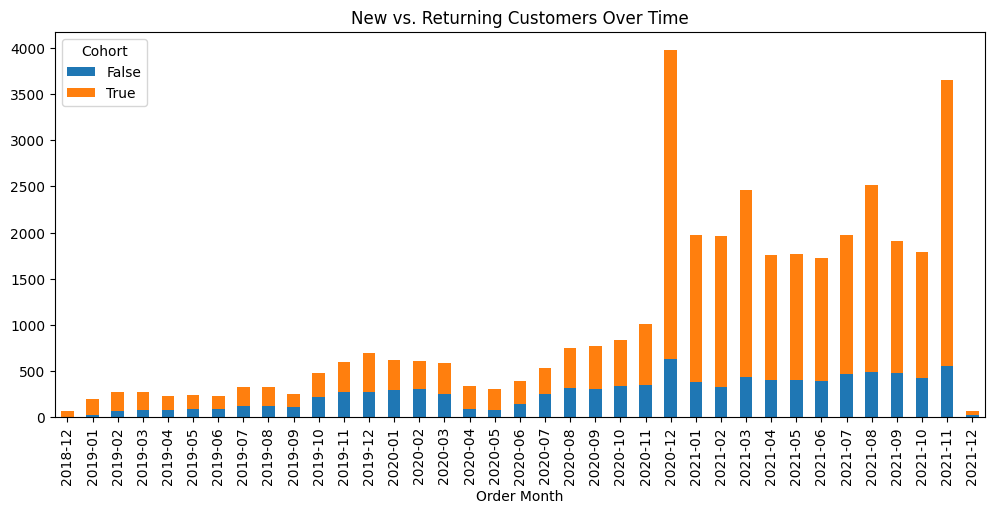

In [121]:
data["Order Month"] = data["Order_datetime"].dt.to_period("M")
first_purchase = data.groupby("User_ID")["Order Month"].min().reset_index()
data = data.merge(first_purchase, on="User_ID", suffixes=("", "_first"))

data["Cohort"] = (data["Order Month"].astype(str) == data["Order Month_first"].astype(str))
cohort_counts = data.groupby(["Order Month", "Cohort"])["User_ID"].nunique().unstack()
cohort_counts.plot(kind="bar", stacked=True, figsize=(12, 5), title="New vs. Returning Customers Over Time")

# How the price of jewelry varies by different categories (e.g., pendant, necklace, earring), and its association with other attributes like Brand_ID, Gender, Main_color, Main_metal, and Main_gem.

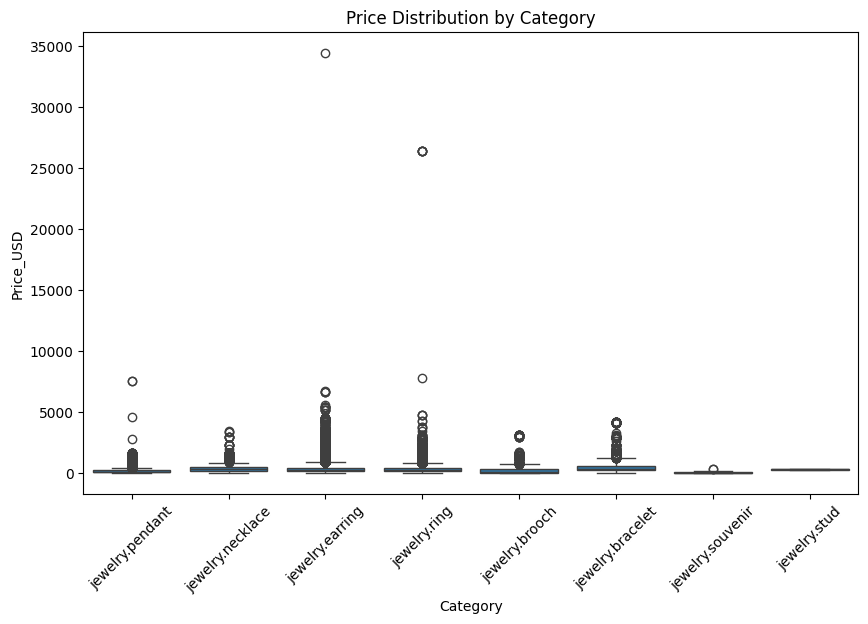

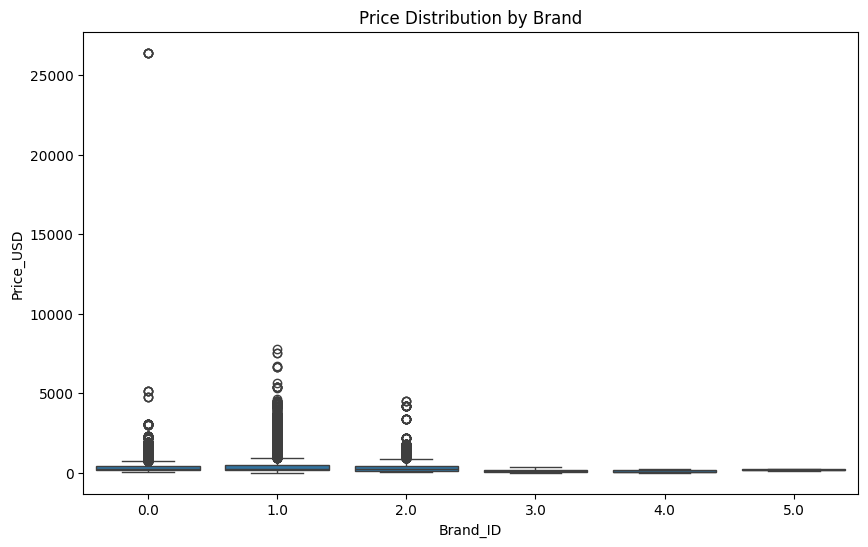

In [122]:
# Visualizing price distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price_USD', data=data)
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

# Visualizing price distribution by brand
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand_ID', y='Price_USD', data=data)
plt.title('Price Distribution by Brand')
plt.show()


# Insights

## Brand Positioning:

- **Brand 0.0 and Brand 5.0**: Positioned as luxury brands, offering high-end products with prices reaching up to 25,000 USD.
- **Brand 1.0 and Brand 4.0**: Positioned as mid-range brands, catering to price-sensitive customers.
- **Brand 2.0 and Brand 3.0**: Positioned as premium brands, offering a mix of mid-range and high-end products.

## Customer Segmentation:

- **Luxury Brands (0.0 and 5.0)**: Target high-income customers who value exclusivity and craftsmanship.
- **Mid-Range Brands (1.0 and 4.0)**: Target middle-income customers who seek quality at affordable prices.
- **Premium Brands (2.0 and 3.0)**: Target customers who are willing to pay a premium for unique designs and superior quality.

## Pricing Strategies:

- **Luxury Brands**: Can maintain high prices due to brand reputation and exclusivity.
- **Mid-Range Brands**: Should focus on competitive pricing to attract price-sensitive customers.
- **Premium Brands**: Can adopt a value-based pricing strategy, emphasizing the unique features of their products.

---

# Recommendations

## Dynamic Pricing:
- Implement dynamic pricing strategies for mid-range brands to remain competitive.
- For luxury brands, focus on maintaining exclusivity and brand value.

## Product Bundling:
- Offer bundled products for mid-range brands to increase average order value.
- For premium brands, introduce limited-edition collections to attract high-end customers.

## Marketing Campaigns:
Tailor marketing campaigns based on brand positioning:
- **Luxury Brands**: Highlight exclusivity and craftsmanship.
- **Mid-Range Brands**: Emphasize affordability and quality.
- **Premium Brands**: Showcase unique designs and superior quality.

## Inventory Management:
- Ensure adequate stock levels for high-demand products in mid-range brands.
- For luxury brands, maintain limited stock to preserve exclusivity.


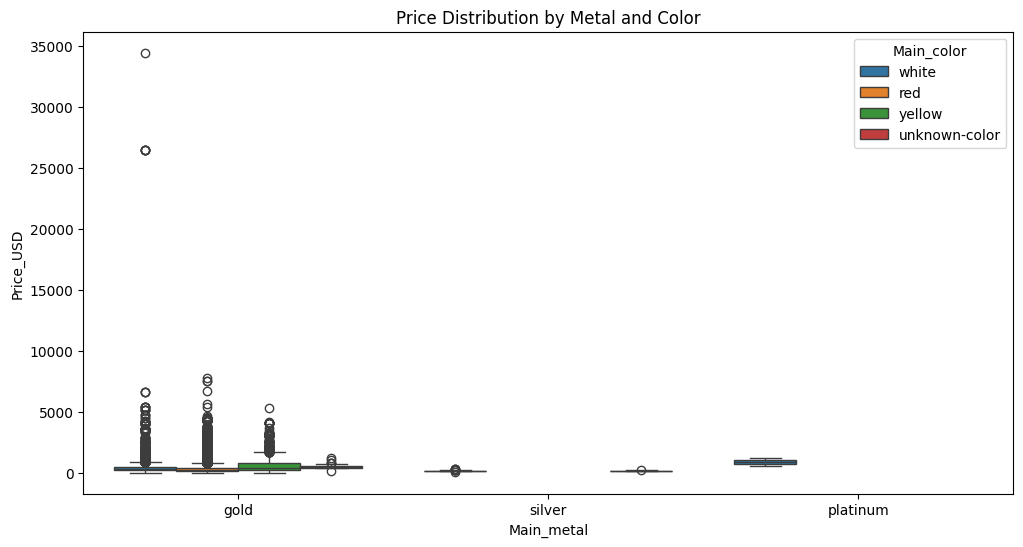

In [123]:
# Visualizing price distribution by metal and color
plt.figure(figsize=(12, 6))
sns.boxplot(x='Main_metal', y='Price_USD', hue='Main_color', data=data)
plt.title('Price Distribution by Metal and Color')
plt.show()


# Insights

## 1. Main Color Insights

- **White**:
  - Represents high-end products, likely due to the association with diamonds or platinum.
  - Customers are willing to pay a premium for white-colored jewelry.

- **Red and Yellow**:
  - Represent mid-range and lower-priced products, likely due to the use of colored gemstones or less expensive materials.

- **Unknown-Color**:
  - The wide price range suggests a mix of products, including both high-end and mid-range items.

## 2. Main Metal Insights

- **Gold**:
  - Mid-range pricing, reflecting its popularity and versatility in jewelry.

- **Silver**:
  - Lower pricing, making it accessible to price-sensitive customers.

- **Platinum**:
  - Higher pricing, reflecting its exclusivity and premium status.

---

# Recommendations

## 1. Pricing Strategies

- **White-Colored Jewelry**:
  - Maintain premium pricing for white-colored jewelry, emphasizing its association with luxury and exclusivity.

- **Red and Yellow-Colored Jewelry**:
  - Offer competitive pricing and promotions to attract price-sensitive customers.

- **Unknown-Color Jewelry**:
  - Segment products based on price range and target different customer segments accordingly.

## 2. Product Bundling

- Bundle gold and silver jewelry with complementary products to increase average order value.
- Introduce platinum collections with unique designs to attract high-end customers.

## 3. Marketing Campaigns

- Highlight the luxury and exclusivity of white-colored and platinum jewelry in marketing campaigns.
- Emphasize the affordability and versatility of red, yellow, and silver jewelry.

## 4. Inventory Management

- Ensure adequate stock levels for high-demand products in the mid-range price segment.
- Maintain limited stock for platinum and white-colored jewelry to preserve exclusivity.


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78087 entries, 0 to 78086
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Order_datetime     78087 non-null  datetime64[ns, UTC]
 1   Order_ID           78087 non-null  int64              
 2   Product_ID         78087 non-null  int64              
 3   Quantity_of_SKU    78087 non-null  int64              
 4   Category_ID        78087 non-null  float64            
 5   Category           78087 non-null  object             
 6   Brand_ID           74719 non-null  float64            
 7   Price_USD          78087 non-null  float64            
 8   User_ID            78087 non-null  float64            
 9   Gender             43714 non-null  object             
 10  Main_color         76212 non-null  object             
 11  Main_metal         78001 non-null  object             
 12  Main_gem           60003 non-null  object     

##Data Cleaning

In [125]:
#Remove unuseful features
data = data.drop(columns=[
    "Order_ID", "Category_ID","Product_ID",
    "User_ID","Order_datetime","Order Month","Order Month_first","Cohort","Quantity_of_SKU","Main_gem"])

In [126]:
data.head()

,Category,Brand_ID,Price_USD,Gender,Main_color,Main_metal,Year,Month,Hour
0,jewelry.pendant,1.0,54.66,f,white,gold,2018,12,13
1,jewelry.pendant,0.0,88.90,f,red,gold,2018,12,17
2,jewelry.necklace,0.0,417.67,NaN,red,gold,2018,12,21
3,jewelry.earring,1.0,102.27,NaN,red,gold,2018,12,22
4,jewelry.earring,0.0,150.55,NaN,red,gold,2018,12,22


In [127]:
# Convert columns to categorical data type
categorical_columns = [
    'Main_metal',
    'Main_color',
    'Gender',
    'Brand_ID',
    'Category'
]

# Apply categorical conversion
for col in categorical_columns:
    data[col] = data[col].astype('category')

In [128]:
from sklearn.preprocessing import LabelEncoder

# Nominal Columns
nominal_columns = ['Main_metal','Main_color', 'Gender', 'Category', 'Brand_ID']


# One-Hot Encoding for Nominal Columns
data = pd.get_dummies(data, columns=nominal_columns, drop_first=True)  # drop_first=True to avoid multicollinearity


In [129]:
data.head()

,Price_USD,Year,Month,Hour,Main_metal_platinum,Main_metal_silver,Main_color_unknown-color,Main_color_white,Main_color_yellow,Gender_m,...,Category_jewelry.necklace,Category_jewelry.pendant,Category_jewelry.ring,Category_jewelry.souvenir,Category_jewelry.stud,Brand_ID_1.0,Brand_ID_2.0,Brand_ID_3.0,Brand_ID_4.0,Brand_ID_5.0
0,54.66,2018,12,13,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
1,88.90,2018,12,17,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,417.67,2018,12,21,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,102.27,2018,12,22,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,150.55,2018,12,22,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Machine Learning

In [130]:
# Specifying our features and target variables
x=data.drop(["Price_USD"],axis=1)   # Features
y=data["Price_USD"]          # Target variable

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [132]:
# Correlation heatmap (if numerical features exist)
#sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
#plt.show()

Linear Regression

In [133]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Ensure numeric values are returned."""
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = float(r2_score(y_train, y_train_pred))
    test_r2 = float(r2_score(y_test, y_test_pred))
    train_rmse = float(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse = float(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    generalization_error = float(abs(train_rmse - test_rmse))

    return train_r2, test_r2, train_rmse, test_rmse, generalization_error


In [134]:
# Train model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Evaluate model
linear_metrics = evaluate_model(linear_model, x_train, y_train, x_test, y_test)
print("Linear Regression Metrics:")
linear_metrics

Linear Regression Metrics:


(0.07371892143889236,
 0.10585449625736176,
 440.07106205987475,
 370.450744588005,
 69.62031747186973)

Random Forest

In [135]:
# Train model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [136]:
# Evaluate model
rf_metrics = evaluate_model(rf_model, x_train, y_train, x_test, y_test)
print("Random Forest Metrics:")
rf_metrics

Random Forest Metrics:


(0.31586694168797214,
 -0.008333981219770692,
 378.20015580108173,
 393.39476393129667,
 15.194608130214931)

In [137]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance values
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print(feature_importance_df.head(10))


                     Feature  Importance
2                       Hour    0.377964
1                      Month    0.259477
12  Category_jewelry.pendant    0.080887
0                       Year    0.080607
10  Category_jewelry.earring    0.039899
7          Main_color_yellow    0.035742
16              Brand_ID_1.0    0.034073
13     Category_jewelry.ring    0.029972
4          Main_metal_silver    0.019675
17              Brand_ID_2.0    0.013431


Neural Network

In [ ]:
# Build neural network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = nn_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model
nn_metrics = evaluate_model(nn_model, x_train, y_train, x_test, y_test)
print("Neural Network Metrics:")
print(nn_metrics)

#MLFLOW

In [ ]:
# Define the MLflow tracking URI with SQLite
MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"

# Start the MLflow server using subprocess
subprocess.Popen(["mlflow", "ui", "--backend-store-uri", MLFLOW_TRACKING_URI, "--port", "5000"])

<Popen: returncode: None args: ['mlflow', 'ui', '--backend-store-uri', 'sqli...>

In [ ]:
# Set MLflow tracking URI
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

MLflow for LR

In [ ]:
#!rm -rf mlruns/

In [ ]:
# Start MLflow tracking
mlflow.set_experiment("Linear_Regression_Experiment")

with mlflow.start_run():
    # Train model
    linear_model = LinearRegression()
    linear_model.fit(x_train, y_train)

    # Evaluate model
    train_r2, test_r2, train_rmse, test_rmse, generalization_error = evaluate_model(linear_model, x_train, y_train, x_test, y_test)

    # Log model
    mlflow.sklearn.log_model(linear_model, "LinearRegressionModel")

    # Log parameters
    mlflow.log_param("Model", "LinearRegression")

    # Log metrics (fixing metric names)
    mlflow.log_metric("Train_R2", float(train_r2))  # Remove special character
    mlflow.log_metric("Test_R2", float(test_r2))
    mlflow.log_metric("Train_RMSE", float(train_rmse))
    mlflow.log_metric("Test_RMSE", float(test_rmse))
    mlflow.log_metric("Generalization_Error", float(generalization_error))

    print("Metrics logged to MLflow successfully.")


2025/01/31 18:41:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Metrics logged to MLflow successfully.


MLflow for RF

In [ ]:
mlflow.set_experiment("Random_Forest_Regression_Experiment")  # Set an experiment name

with mlflow.start_run():
    # Train the model
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(x_train, y_train)

    # Log parameters
    mlflow.log_param("random_state", 42)

    # Evaluate model
    rf_metrics = evaluate_model(rf_model, x_train, y_train, x_test, y_test)

    # Log metrics
    mlflow.log_metric("Train_R2", float(train_r2))  # Remove special character
    mlflow.log_metric("Test_R2", float(test_r2))
    mlflow.log_metric("Train_RMSE", float(train_rmse))
    mlflow.log_metric("Test_RMSE", float(test_rmse))
    mlflow.log_metric("Generalization_Error", float(generalization_error))

    # Log model
    mlflow.sklearn.log_model(rf_model, "random_forest_model")

    print("Model logged in MLflow!")


2025/01/31 18:42:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model logged in MLflow!


MLflow for ANN


In [ ]:
mlflow.set_experiment("Neural_Network_Regression_Experiment")  # Set experiment name

with mlflow.start_run():

    # Log hyperparameters
    mlflow.log_param("optimizer", "adam")
    mlflow.log_param("loss", "mean_squared_error")
    mlflow.log_param("epochs", 50)
    mlflow.log_param("batch_size", 32)

    # Log metrics
    mlflow.log_metric("Train_R2", float(train_r2))  # Remove special character
    mlflow.log_metric("Test_R2", float(test_r2))
    mlflow.log_metric("Train_RMSE", float(train_rmse))
    mlflow.log_metric("Test_RMSE", float(test_rmse))
    mlflow.log_metric("Generalization_Error", float(generalization_error))

    # Log training loss over epochs
    for epoch, loss in enumerate(history.history["loss"]):
        mlflow.log_metric("training_loss", loss, step=epoch)

    # Log validation loss over epochs
    for epoch, val_loss in enumerate(history.history["val_loss"]):
        mlflow.log_metric("validation_loss", val_loss, step=epoch)

    # Log the model
    mlflow.tensorflow.log_model(nn_model, "neural_network_model")

    print("Neural Network model logged in MLflow!")

2025/01/31 13:03:39 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/01/31 13:03:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Neural Network model logged in MLflow!


In [ ]:
#2sOTml5r8sNURqw92vOEM4CrdIb_6ByDD1BVQN9wgTgrAXjRL

#ML TRACKING

In [ ]:
# Set up ngrok for exposing the MLflow UI
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth
··········


In [ ]:
# Expose the MLflow UI on port 5000
port = 5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel "{public_url}" -> "http://127.0.0.1:{port}"')

 * ngrok tunnel "https://4d9a-34-82-113-27.ngrok-free.app" -> "http://127.0.0.1:5000"


#MLFLOW IMPLEMENTATION

In [139]:

# Save the trained model
joblib.dump(linear_model, 'jewelry_price_optimizer_linear.pkl')


['jewelry_price_optimizer_linear.pkl']